In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('glass.xlsx', sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

# Visualization

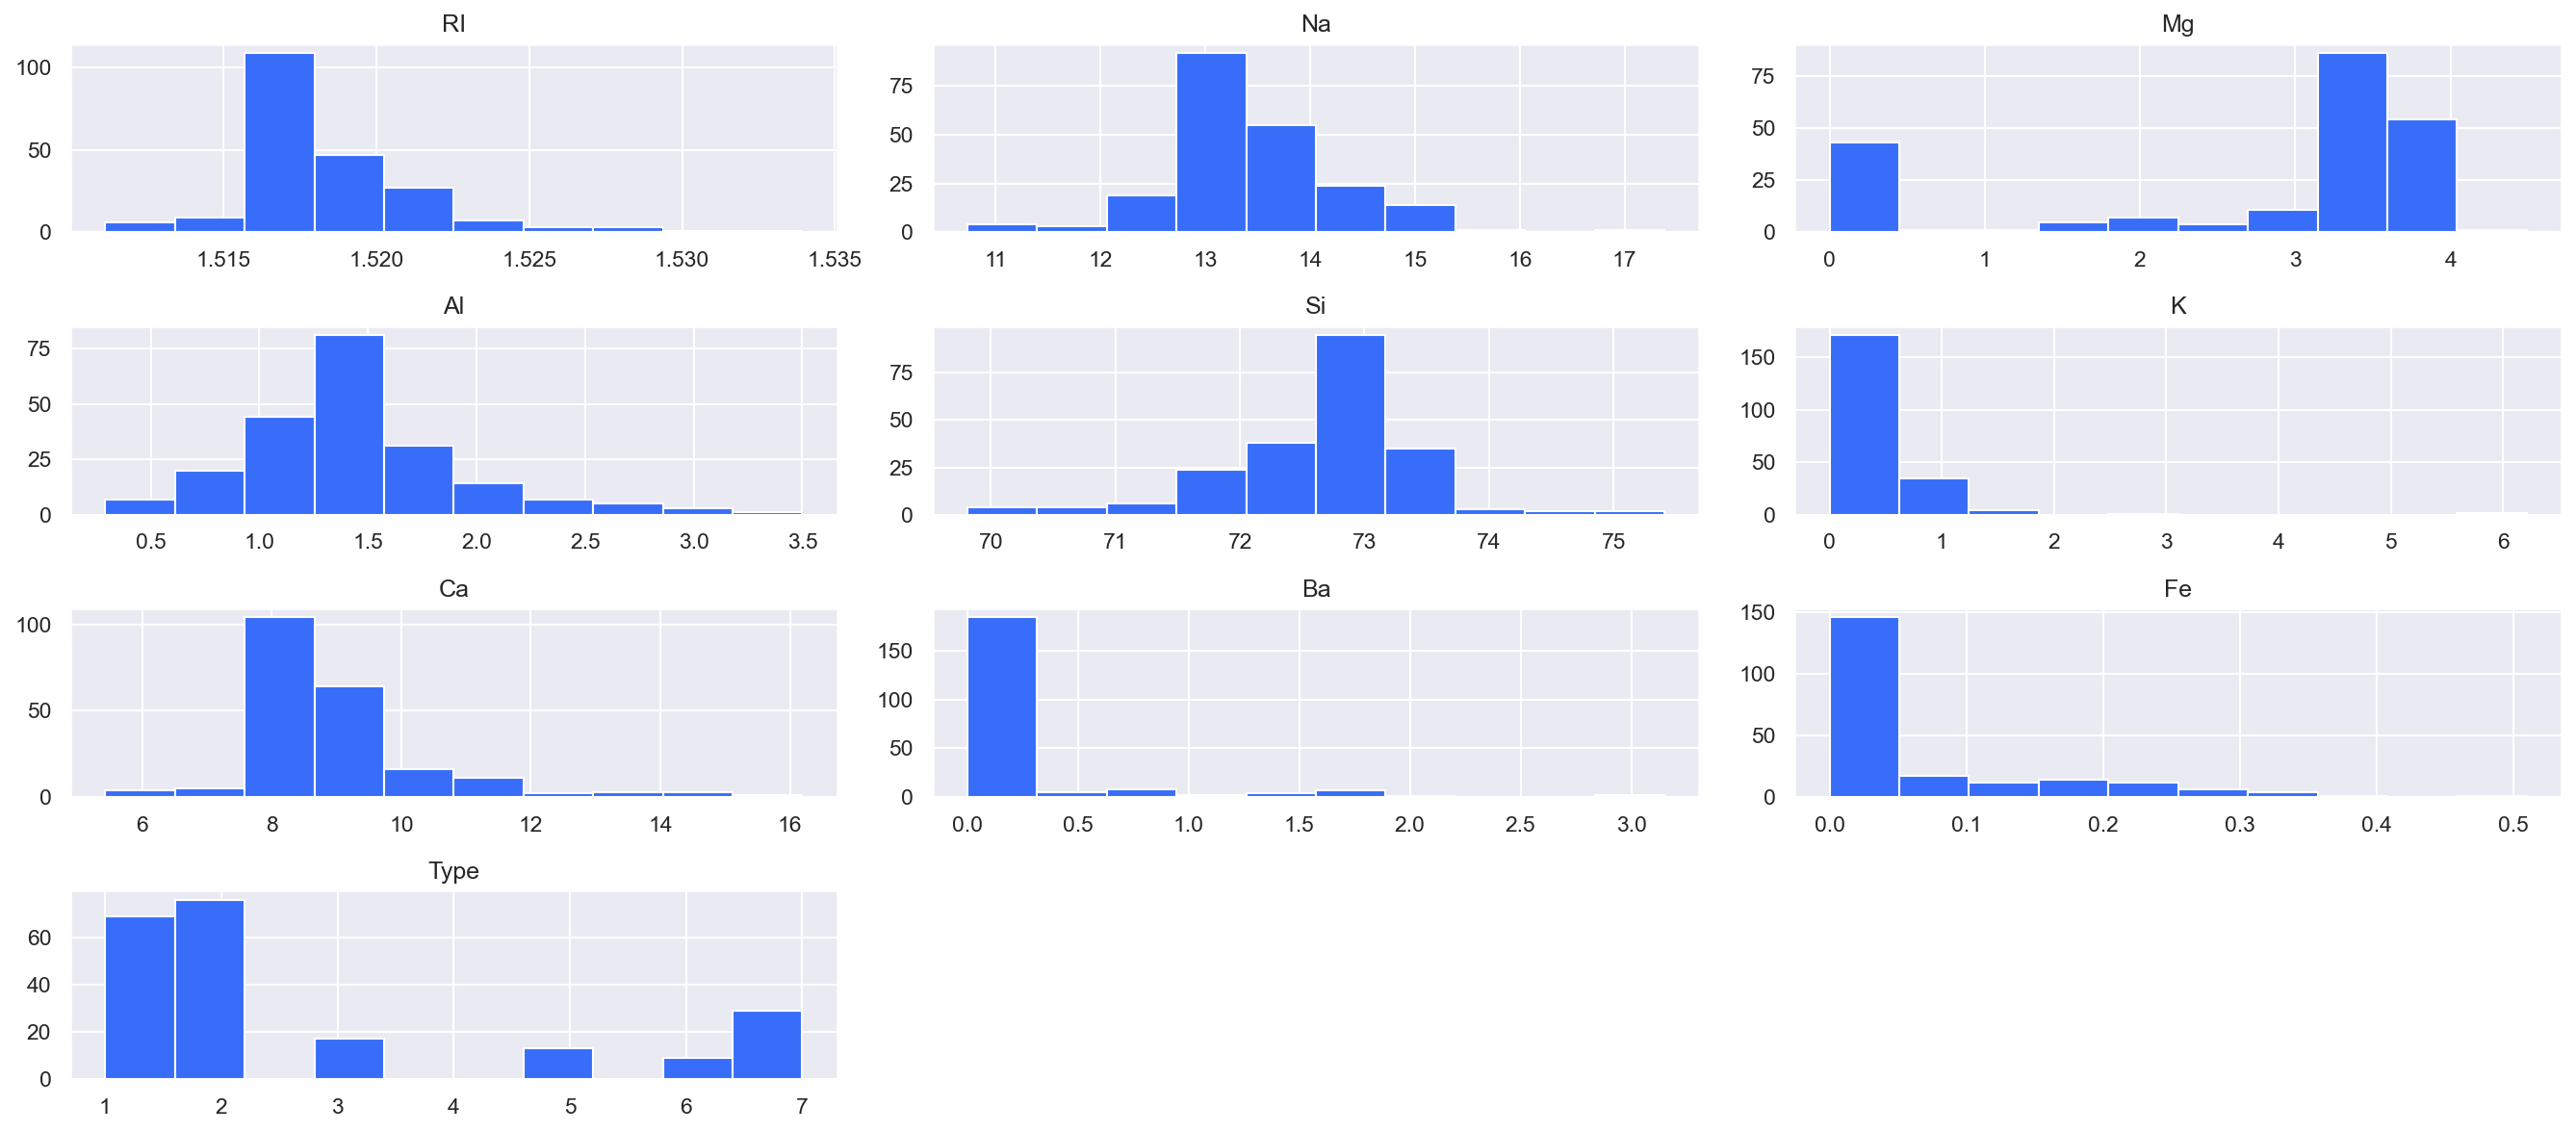

In [9]:
df.hist()
plt.tight_layout()

Text(0.5, 1.0, 'Count of Glass Types')

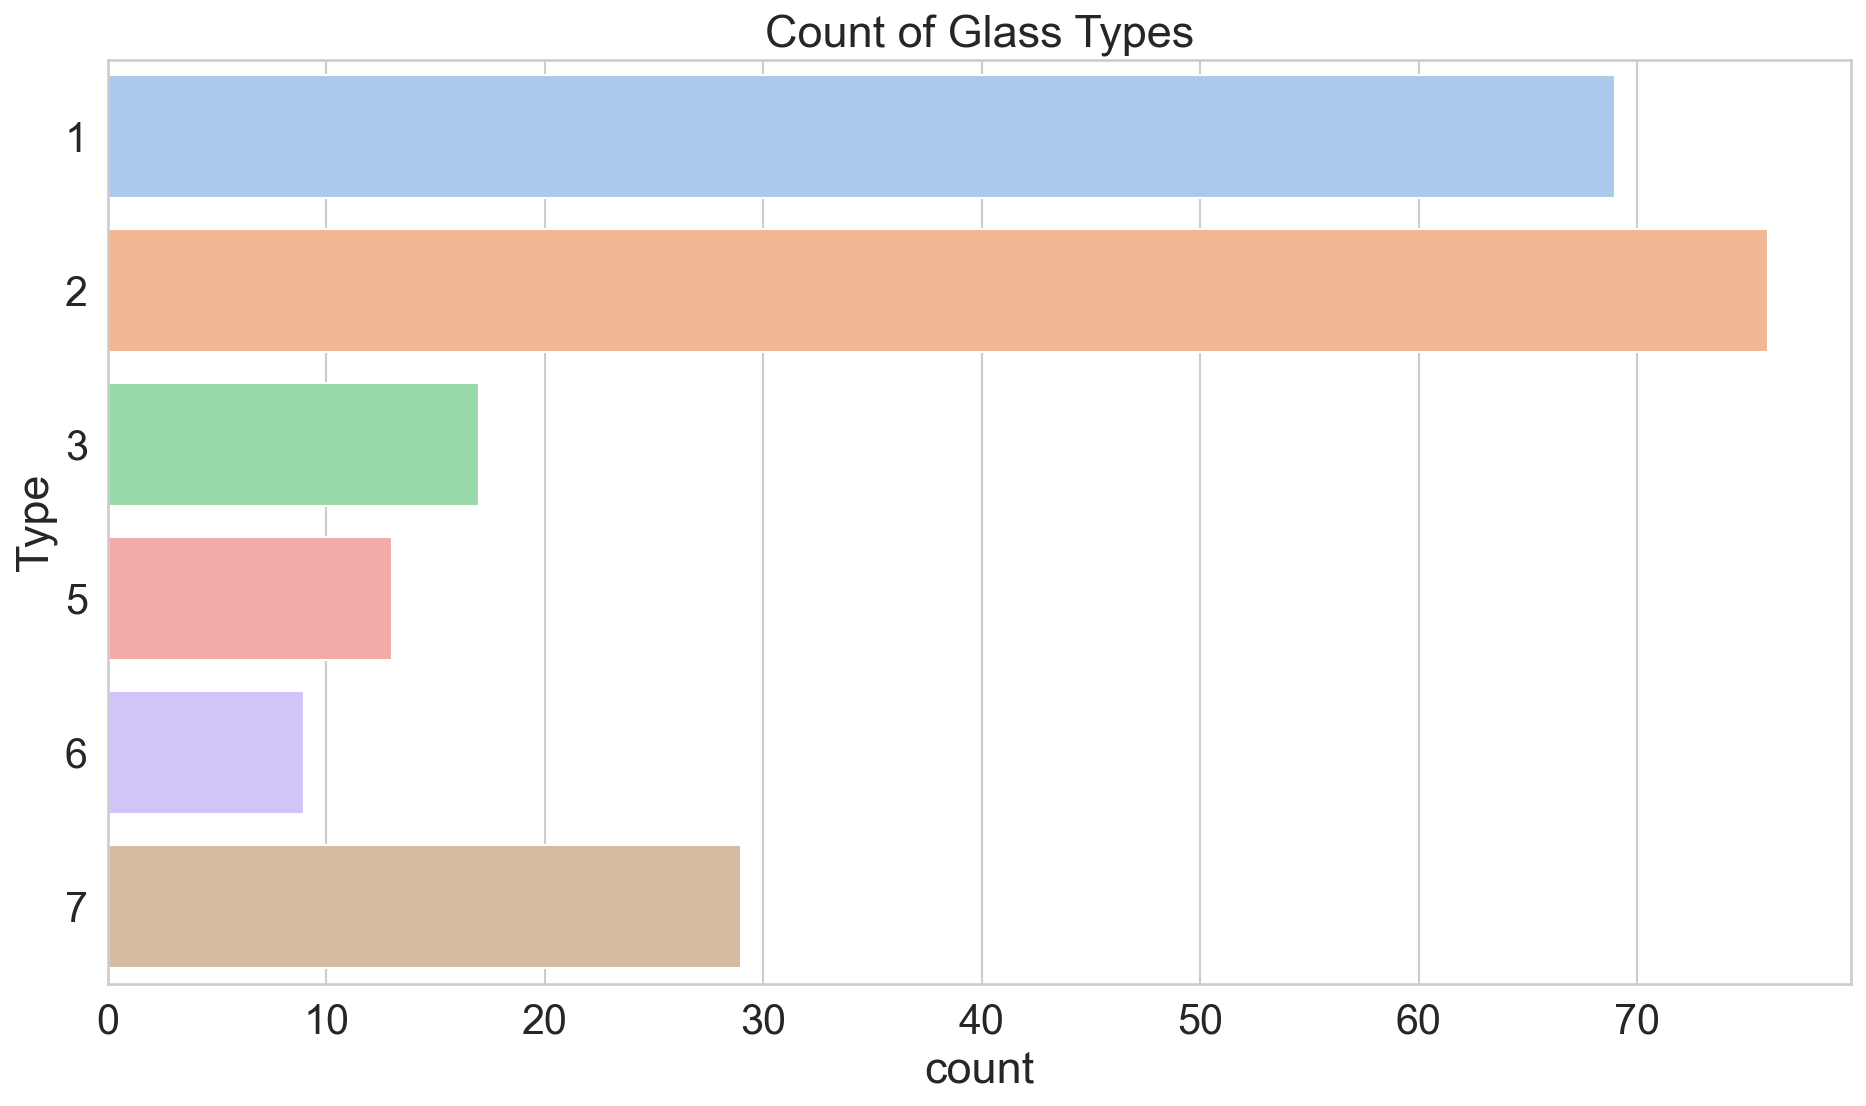

In [10]:
sns.set(style="whitegrid", font_scale=1.8,)
plt.subplots(figsize = (15,8))
sns.countplot(data=df,y='Type',palette='pastel').set_title('Count of Glass Types')

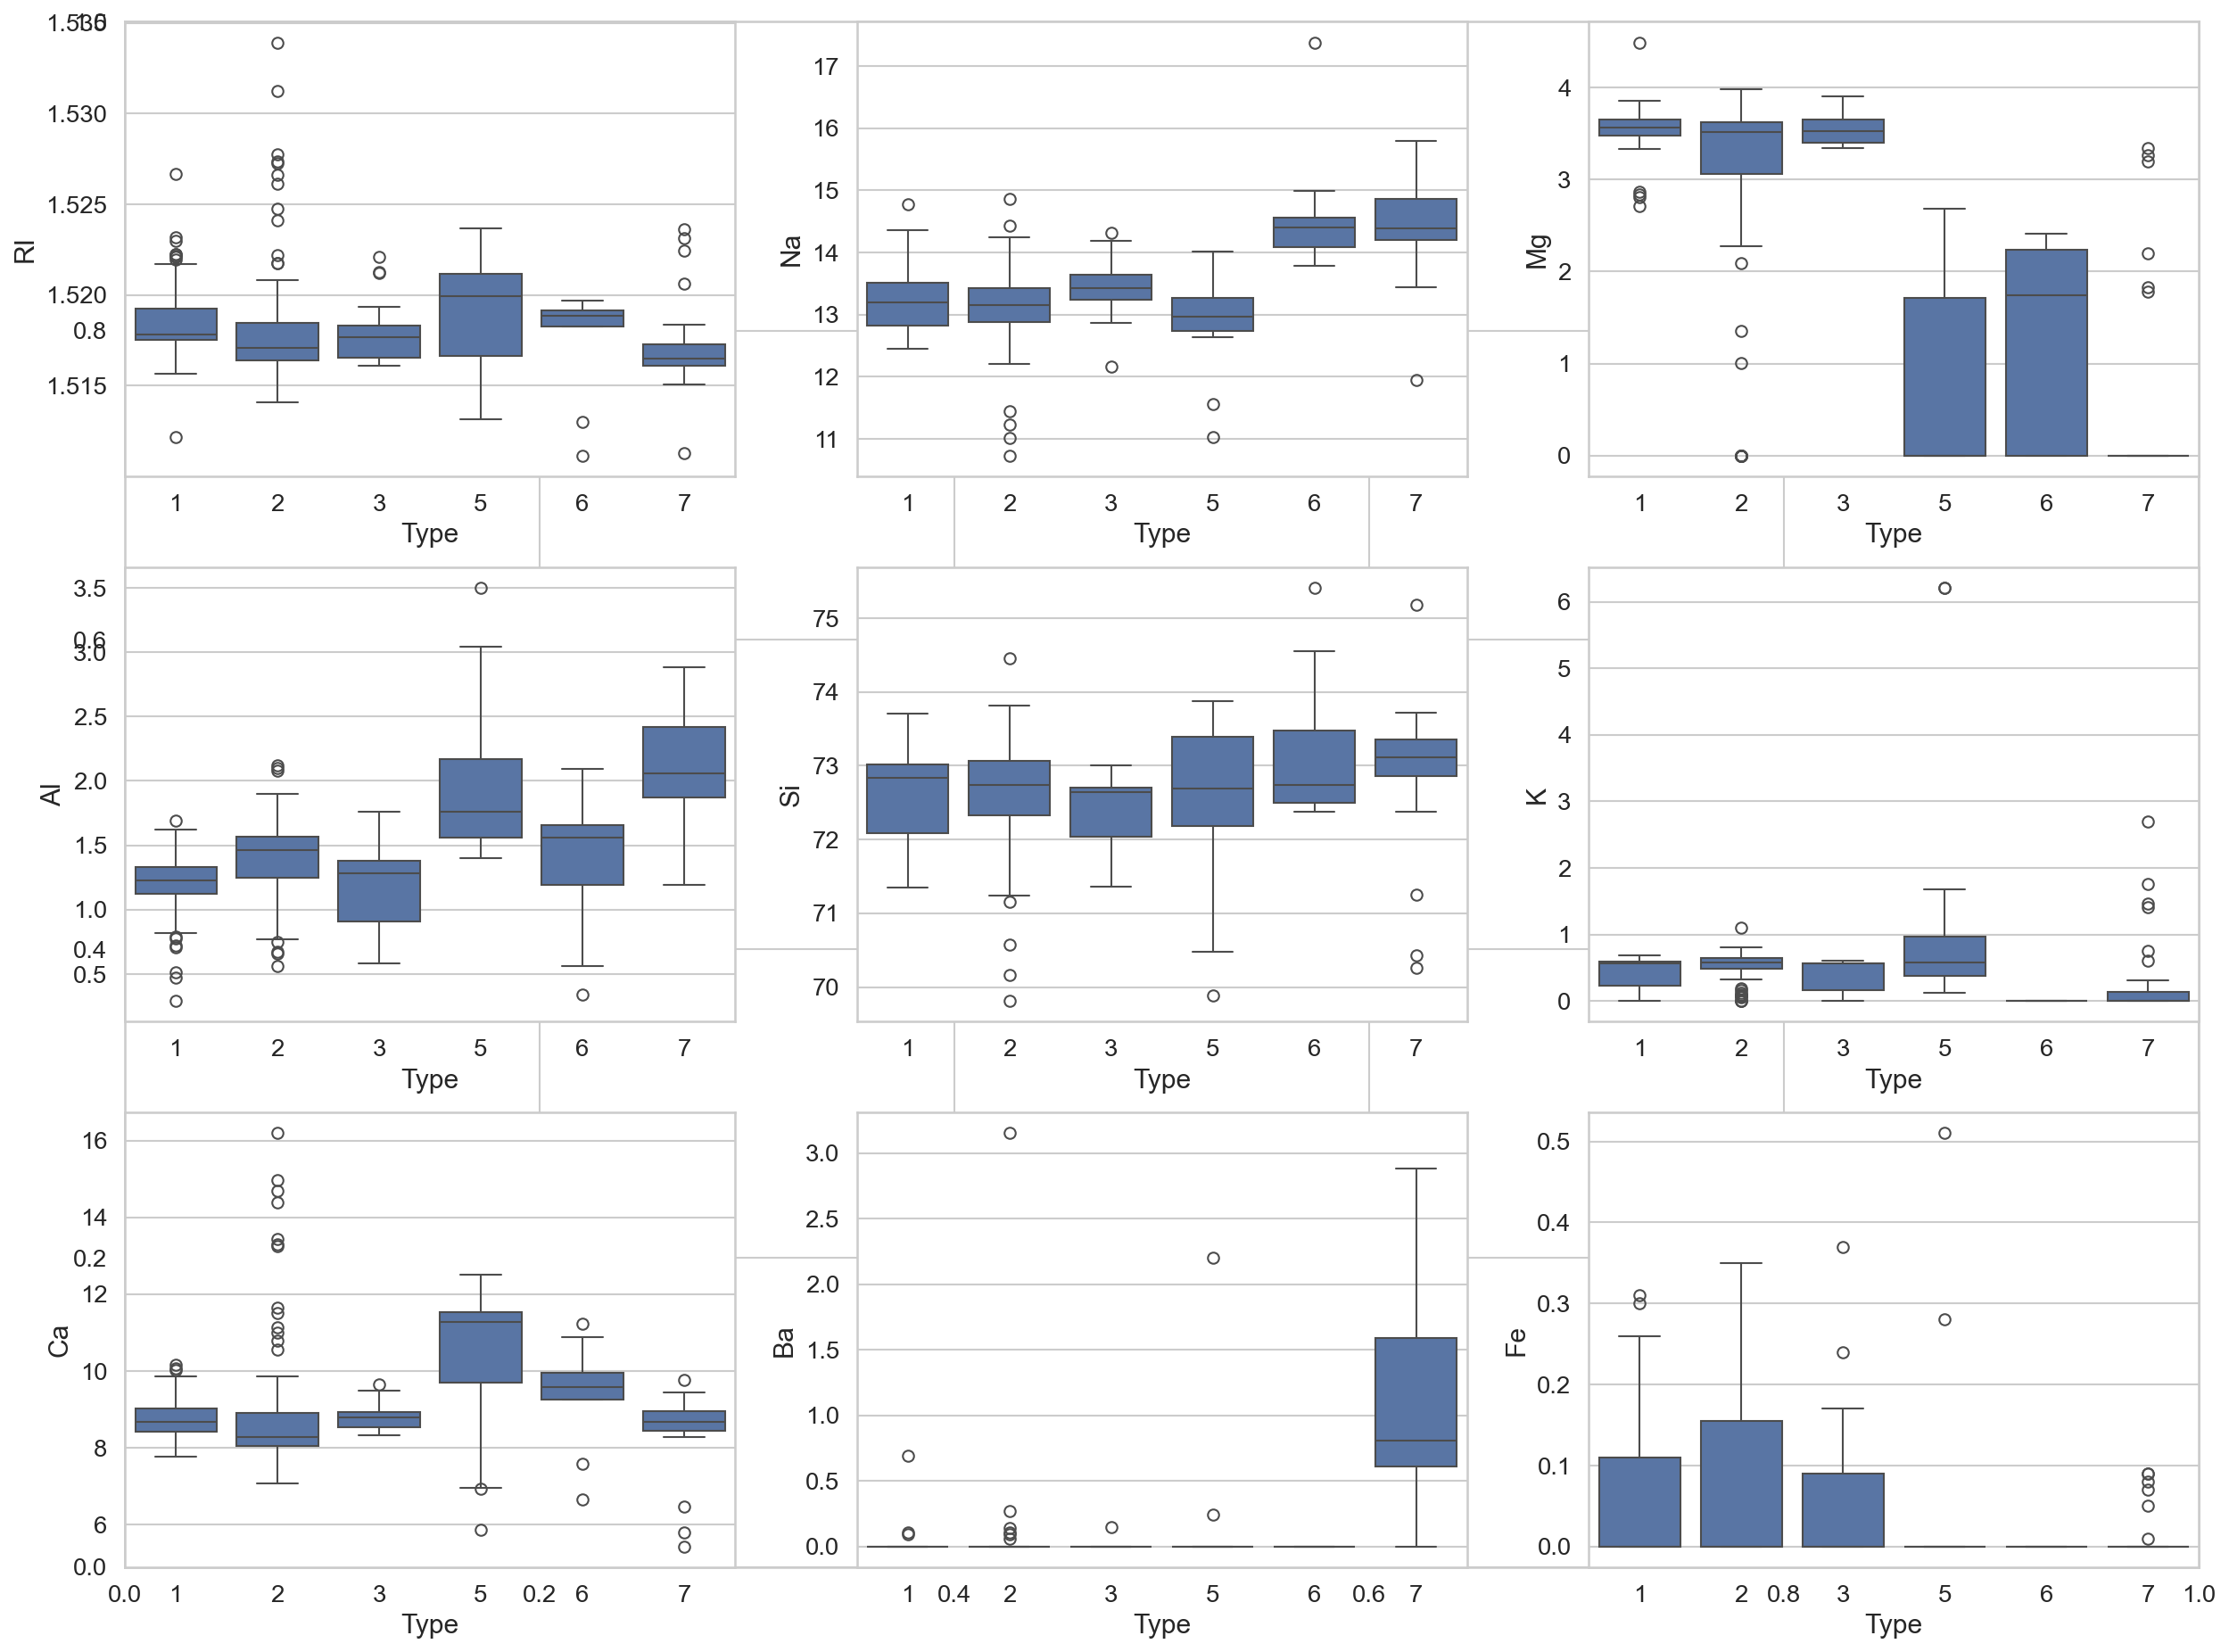

In [11]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=df)
plt.show()

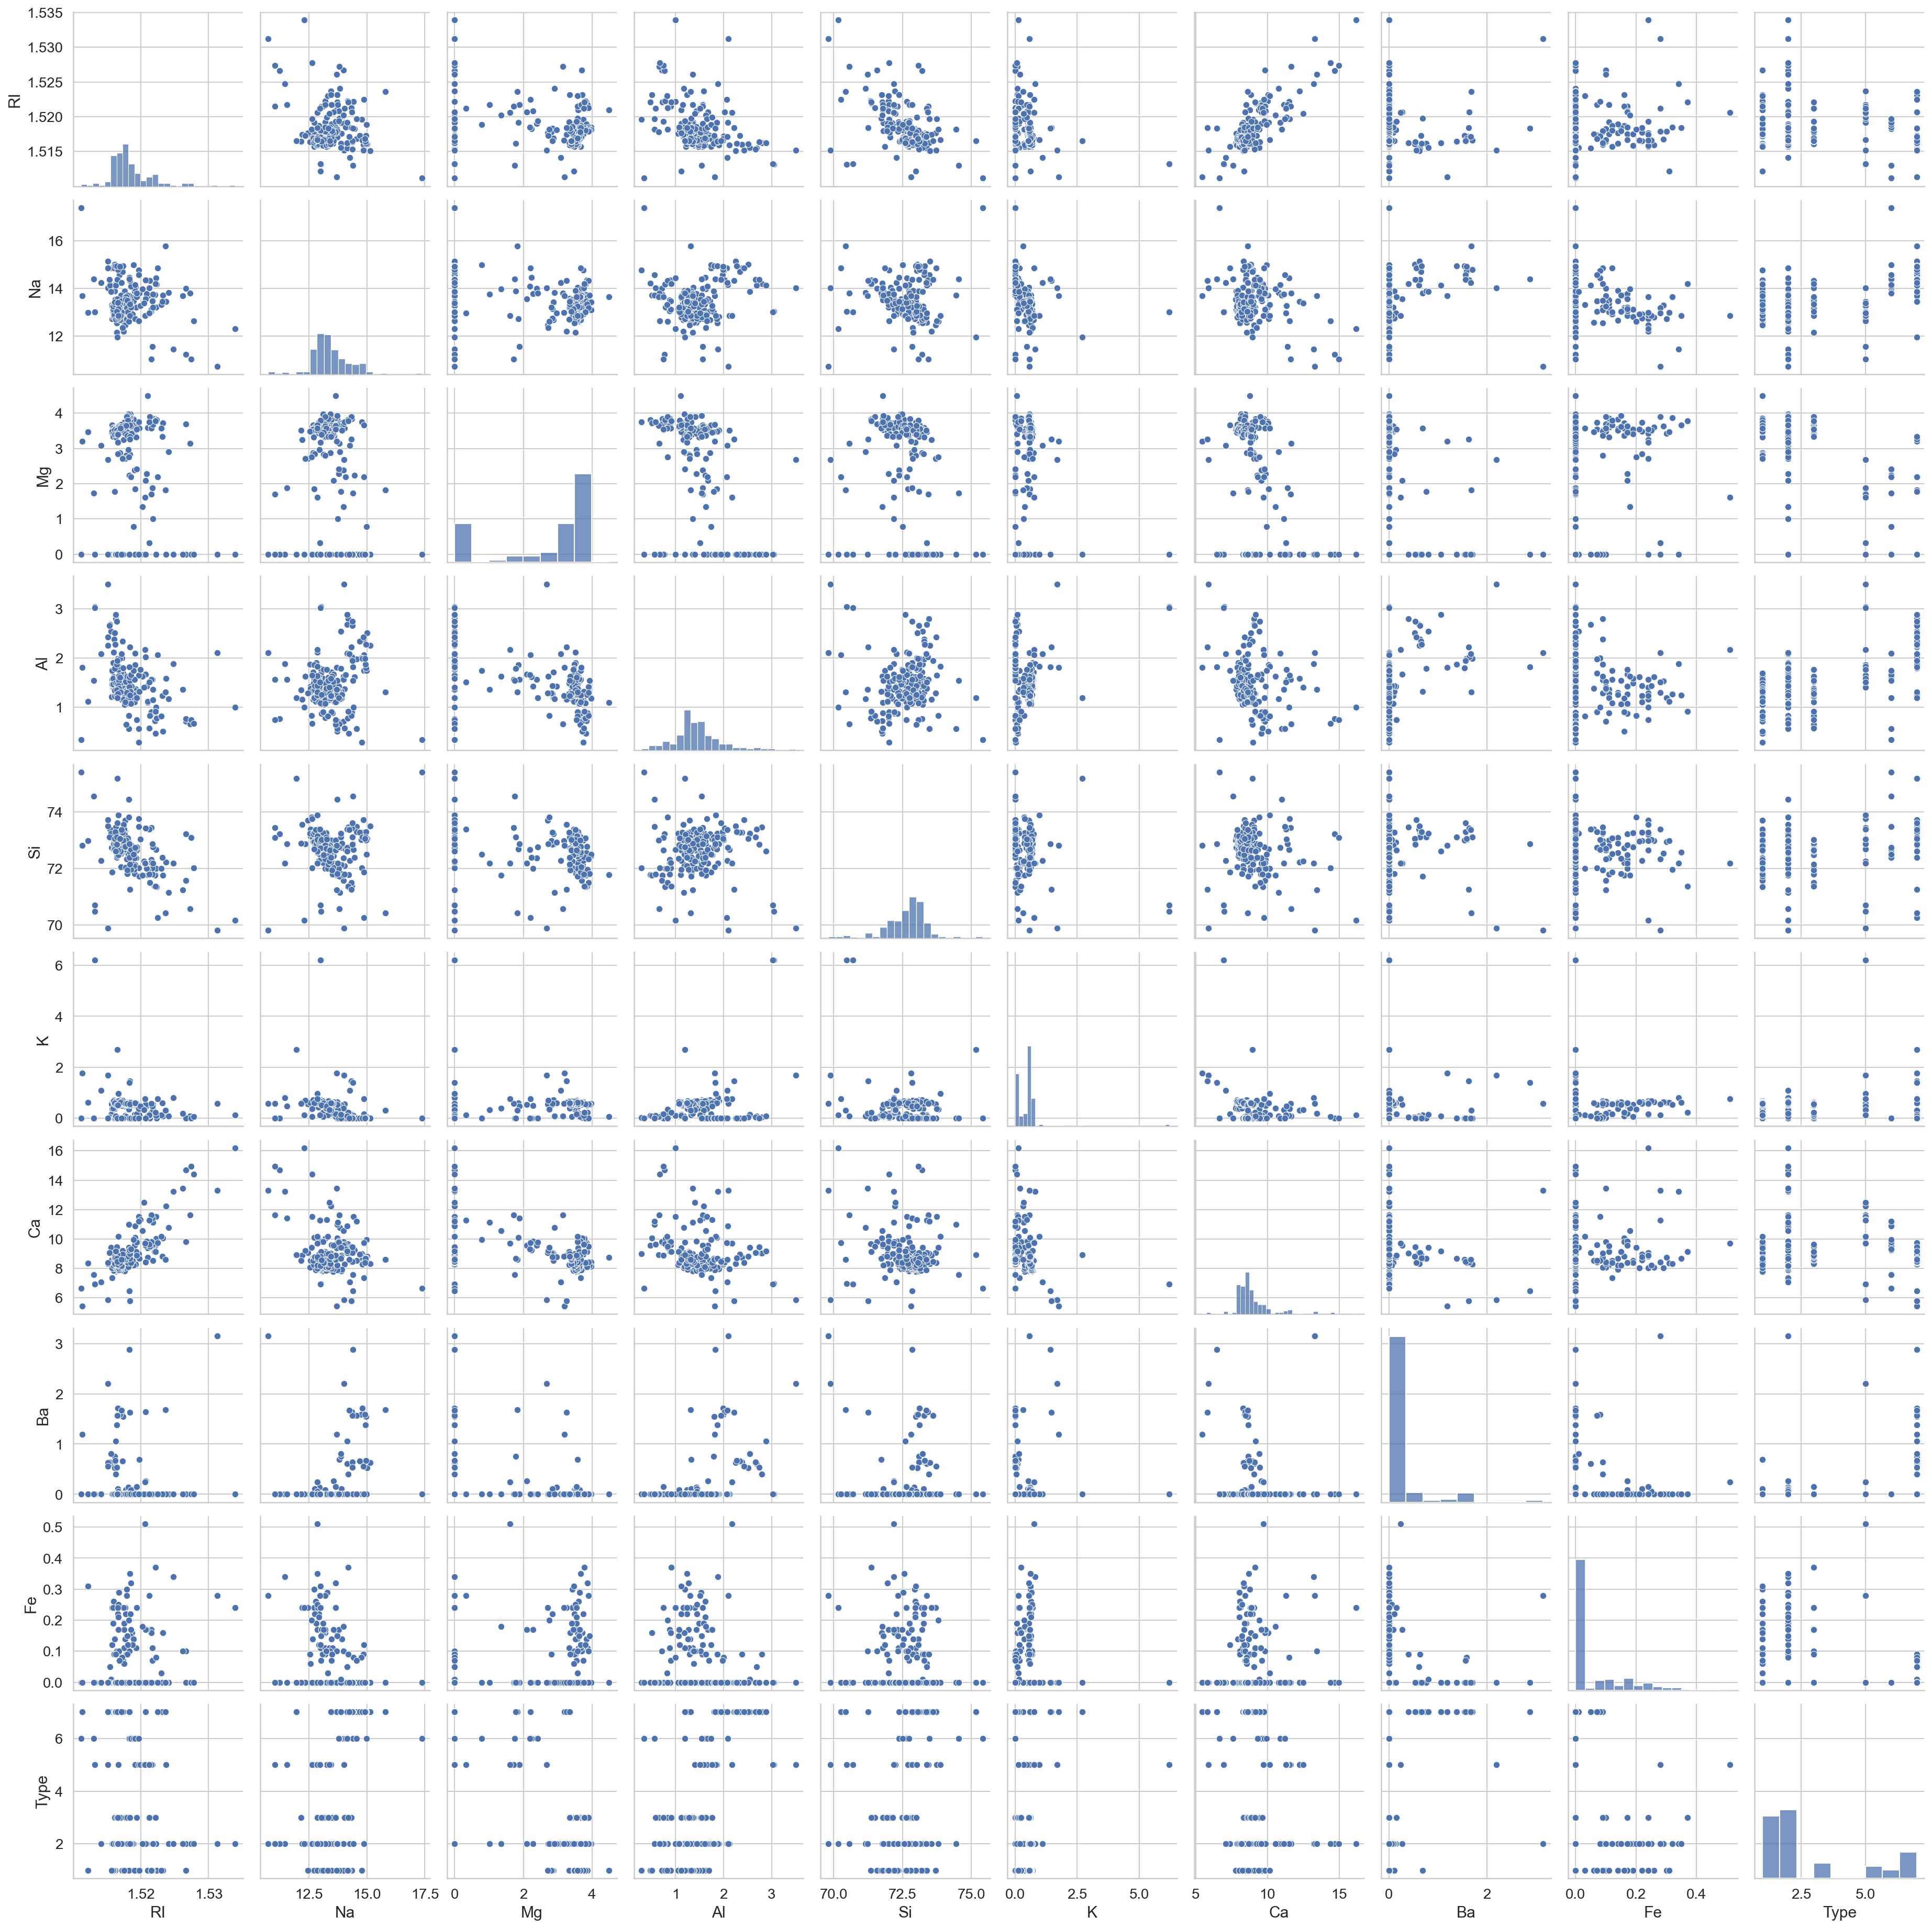

In [12]:
sns.pairplot(df)

<Axes: >

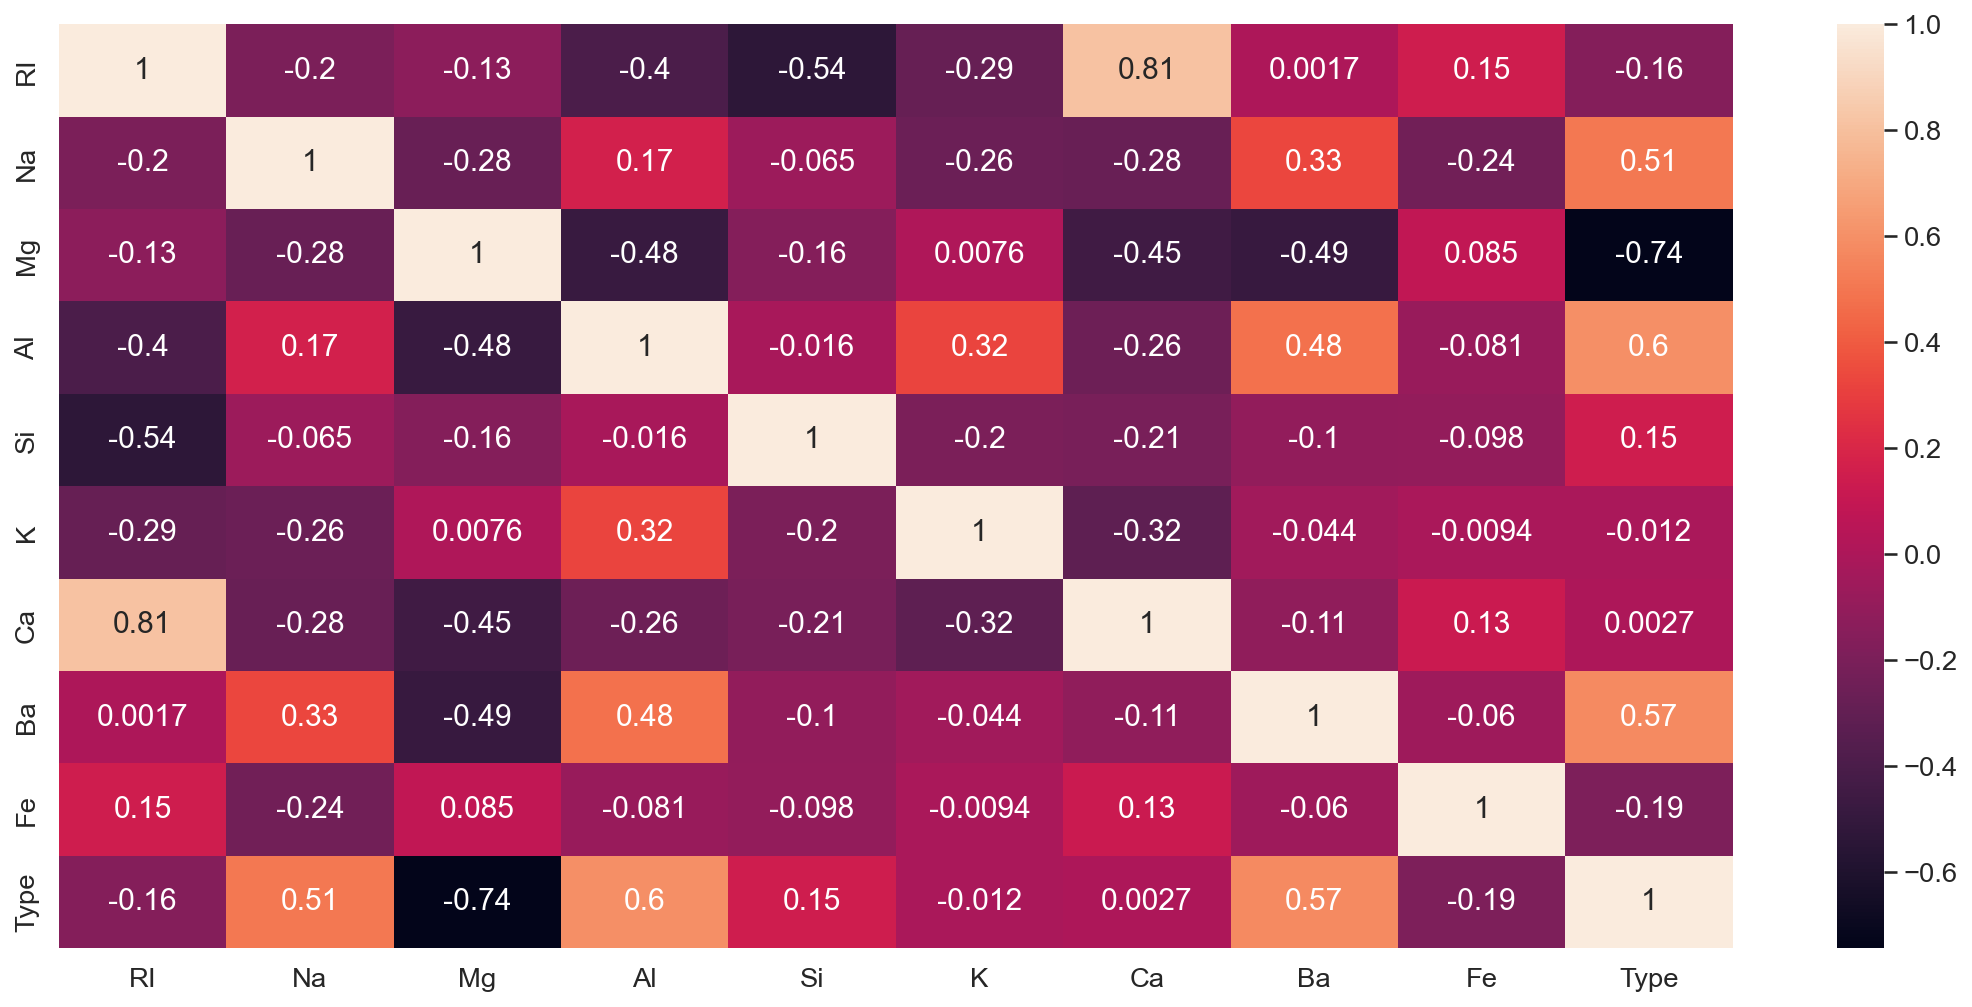

In [13]:
sns.heatmap(df.corr(),annot=True)

## Splitting the data for training and testing.

In [14]:
X = df.drop(columns=['Type'])
Y = df['Type']

In [15]:
# Standardizing the data

sc = StandardScaler()
scaled = sc.fit_transform(X)
scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2, random_state=42)

In [17]:
print("xtrain:",xtrain.shape)
print("ytrain:",ytrain.shape)
print("xtest:",xtest.shape)
print("ytest:",ytest.shape)

xtrain: (170, 9)
ytrain: (170,)
xtest: (43, 9)
ytest: (43,)


## Random Forest model building

In [18]:
# Creating a function for model building.

def prediction(model, X_train=xtrain, y_train=ytrain, X_test=xtest, y_test=ytest ):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print('Classification Report')
    print(classification_report(y_test,y_pred))
    return model.estimators_[0]

In [19]:
Tree_model = prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7441860465116279
Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.64      0.60      0.62        15
           3       1.00      1.00      1.00         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.74        43
   macro avg       0.80      0.73      0.75        43
weighted avg       0.76      0.74      0.74        43



In [20]:
# Tuning the hyperparameters.

params = {
    'n_estimators':[100,150,200],
    'criterion':['gini', 'entropy'],
    'max_depth':[3,5,7,11],
    'max_features':['auto', 'sqrt', 'log2'],
}

grid = GridSearchCV(RandomForestClassifier(random_state = 1234), params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [21]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [22]:
# Final model fitting with the best parameters.

Tree_model = prediction(RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt', n_estimators=100, random_state=1234))

Train Accuracy: 0.9705882352941176
Test Accuracy: 0.7906976744186046
Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.77      0.67      0.71        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.79        43
   macro avg       0.86      0.80      0.81        43
weighted avg       0.82      0.79      0.79        43



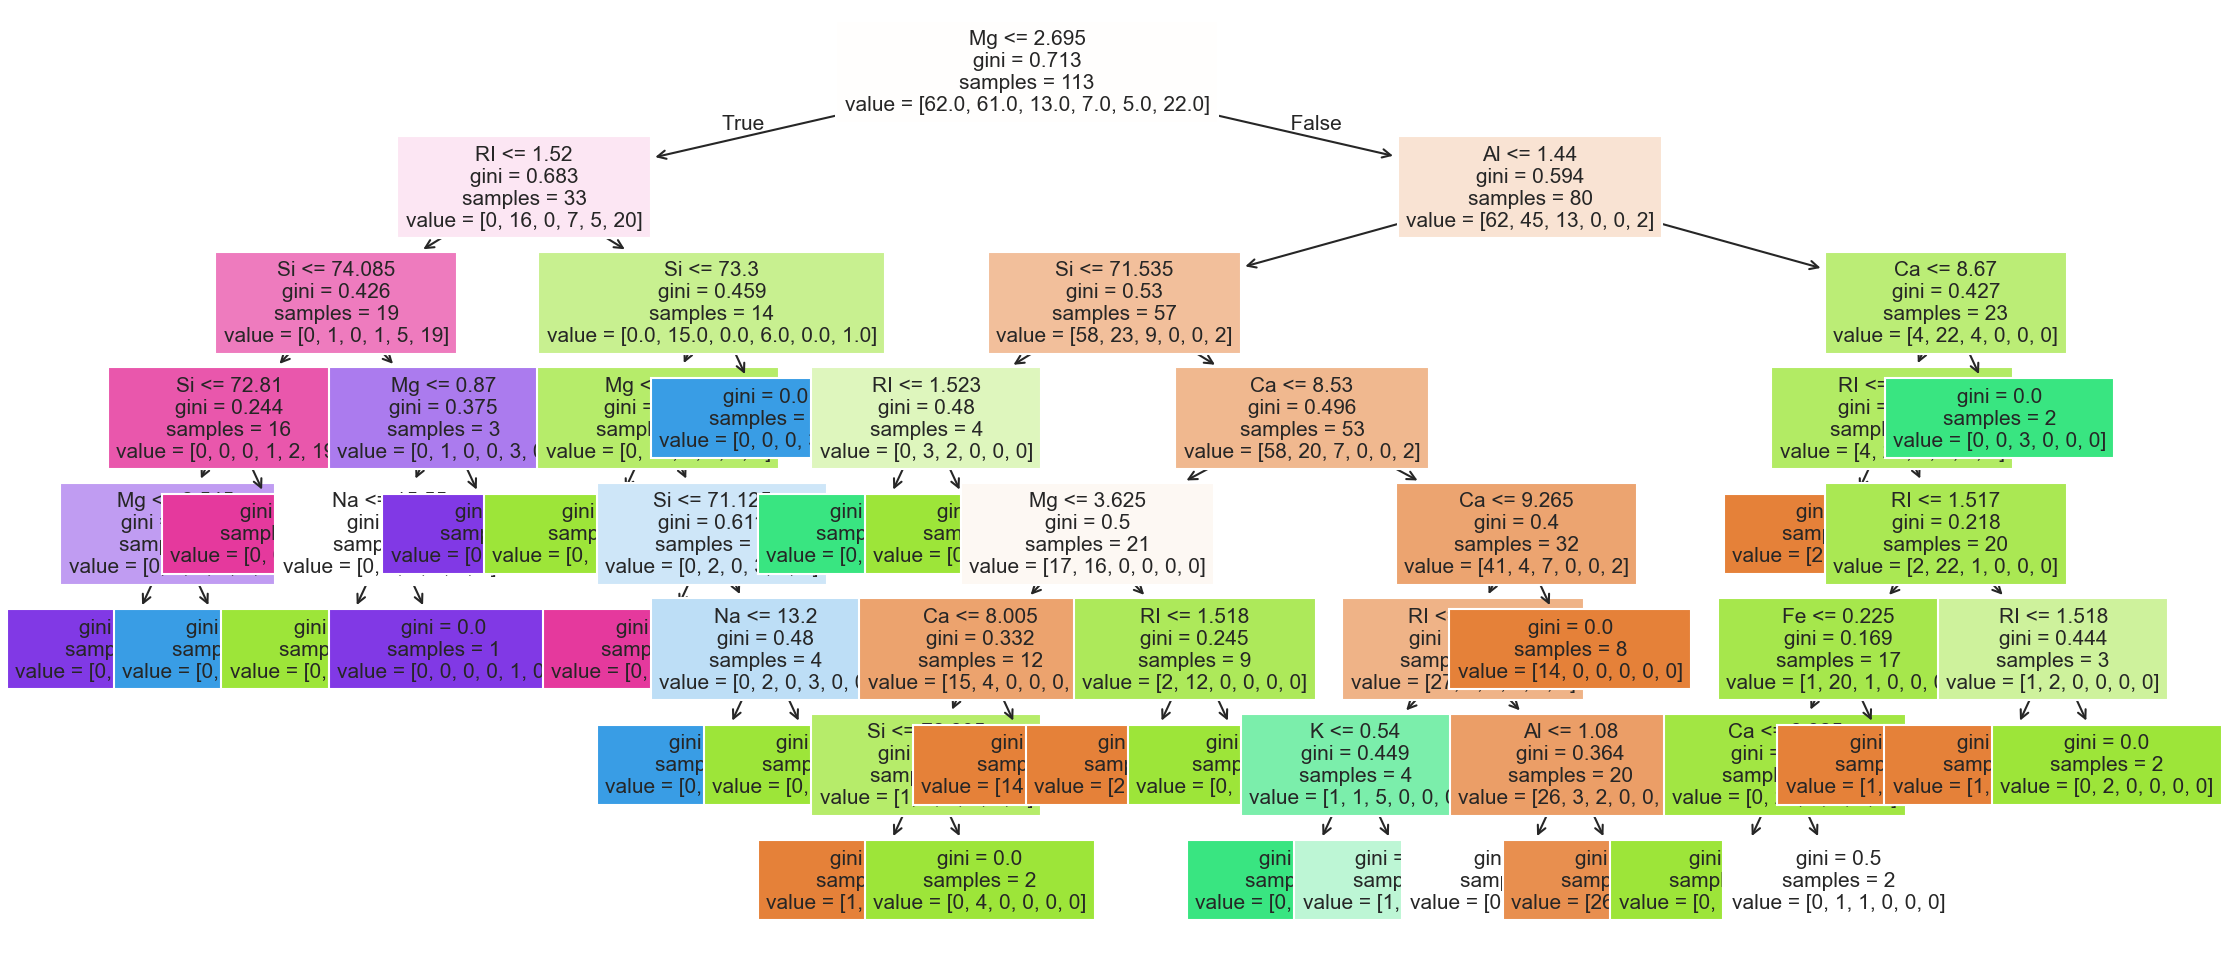

In [23]:
tree.plot_tree(Tree_model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

## Now applying bagging and boosting to check the model.

In [24]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

Tree_model1 = prediction(GradientBoostingClassifier(n_estimators=100, random_state=1234))

Train Accuracy: 1.0
Test Accuracy: 0.7441860465116279
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.90      0.78        10
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.74        43
   macro avg       0.79      0.69      0.72        43
weighted avg       0.75      0.74      0.74        43



In [25]:
# Hyperparameter tuning.

from sklearn.model_selection import GridSearchCV, train_test_split

params = {
    'learning_rate' : [ 0.2, 0.3],
    'n_estimators' : [90,110,150],
    'subsample' : [0.5, 0.7],
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : [2,3,4]}

grid = GridSearchCV(GradientBoostingClassifier(random_state=1234), params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=1234),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.2, 0.3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 110, 150],
                         'subsample': [0.5, 0.7]},
             verbose=1)

In [26]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.3,
 'min_samples_split': 2,
 'n_estimators': 90,
 'subsample': 0.7}

In [27]:
Tree_model1 = prediction(GradientBoostingClassifier(learning_rate=0.3, min_samples_split=2, subsample=0.7, n_estimators=110, criterion='friedman_mse', random_state=1234))

Train Accuracy: 1.0
Test Accuracy: 0.7674418604651163
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.67      0.80      0.73        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.77        43
   macro avg       0.81      0.69      0.74        43
weighted avg       0.78      0.77      0.77        43



In [28]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)


print("xtrain :", x_train.shape)
print("xtest  :", x_test.shape)
print("ytrain :", y_train.shape)
print("ytest  :", y_test.shape)

xtrain : (170, 9)
xtest  : (43, 9)
ytrain : (170,)
ytest  : (43,)


In [30]:
def prediction1(model, X_train=x_train, y_train=y_train, X_test=x_test, y_test=y_test ):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {model.score(X_train,y_train)}")
    print(f"Test Accuracy: {model.score(X_test,y_test)}")
    print('Classification Report')
    print(classification_report(y_test,y_pred))

In [31]:
prediction1(XGBClassifier(random_state=1234))

Train Accuracy: 1.0
Test Accuracy: 0.8604651162790697
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.81      0.87      0.84        15
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      0.78      0.88         9

    accuracy                           0.86        43
   macro avg       0.90      0.87      0.87        43
weighted avg       0.87      0.86      0.86        43



In [32]:
# Hyperparameter tunning.

params = {
    'n_estimators' : [90,110],
    'learning_rate' : [0.1, 0.2],
    'booster' : ['gbtree'],
    #'lambda' : [0,1,2,3],
    'subsample' : [0.5, 0.7, 1.0],
    #'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : [2,3,4],
    #'min_samples_leaf' : [1,2,3],
    'max_depth' : [3,5],
    #'max_features' :['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(XGBClassifier(random_state=1234), params, verbose=1)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1234, ...),
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3, 5], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 110],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=1)

In [33]:
grid.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 110,
 'subsample': 0.7}

In [34]:
prediction1(model = XGBClassifier(booster='gbtree', subsample=0.7, criterion='friedman_mse', learning_rate=0.2, max_depth=5, n_estimators=110,random_state=1234))

Train Accuracy: 1.0
Test Accuracy: 0.813953488372093
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.67      0.93      0.78        15
           2       1.00      0.67      0.80         3
           3       1.00      0.33      0.50         3
           4       1.00      0.67      0.80         3
           5       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.93      0.71      0.78        43
weighted avg       0.86      0.81      0.81        43



## Additional Notes:

#### 1. Explain Bagging and Boosting methods. How is it different from each other.

1. Bagging (Bootstrap Aggregating)-Bagging is an ensemble learning method designed to improve the stability and accuracy of machine learning algorithms. It involves-Bootstrapping: Randomly sampling with replacement from the training dataset to create multiple subsets.
Training: Building a model (e.g., decision tree) on each subset independently.
Aggregation: Combining the predictions of all models, typically by averaging for regression or voting for classification.

2. Boosting-Boosting is an ensemble technique that builds models sequentially, with each new model trying to correct the errors of the previous ones. It involves- Sequential Training: Training models one after another, each focusing more on the misclassified instances from the previous models.
Weight Adjustment: Increasing the weight of misclassified instances so that subsequent models focus more on them.
Aggregation: Combining the predictions of all models, typically by weighted voting or averaging.

Difference between Bagging and Boosting:
Bagging moodels are built independently in parallel whereas boosting moodels are built sequentially, each correcting the previous one.
Bagging method aims to reduce variance whereas boosting method aims to reduce both bias and variance by focusing on hard-to-classify instances.
Bagging moetho uses bootstrapped subsets of the original dataset whereas Boosting method uses the entire dataset but adjusts weights based on previous errors.
Bagging method odels are independent of each other whereas Boosting method models are dependent, with each new model built on the errors of the previous ones.




#### 2. Explain how to handle imbalance in the data.

Handling imbalanced data involves:
1. Resampling Techniques:
   Undersampling: Reduce the majority class samples.
   Oversampling: Increase the minority class samples (e.g., SMOTE).
2. Algorithmic Approaches:
   Cost-sensitive Learning: Assign higher penalties to misclassifications of the minority class.
   Ensemble Methods: Use techniques like Balanced Random Forests and AdaBoost.
3. Evaluation Metrics:
   Use metrics like Precision, Recall, F1-Score, ROC-AUC, and Precision-Recall AUC instead of accuracy.
4. Data Augmentation:
5. Create variations of the minority class data, especially useful for image and text data.
6. Anomaly Detection Techniques:
   Treat the minority class as anomalies in tasks like fraud detection.
7. Hybrid Methods:
   Combine multiple techniques (e.g., SMOTE with cost-sensitive learning).
8. Advanced Models:
   Use models like XGBoost or LightGBM that handle imbalanced data effectively.